## Closed Form 

2.2 0.6
Predictions: [2.8 3.4 4.  4.6 5.2]
Actual: [2 4 5 4 5]


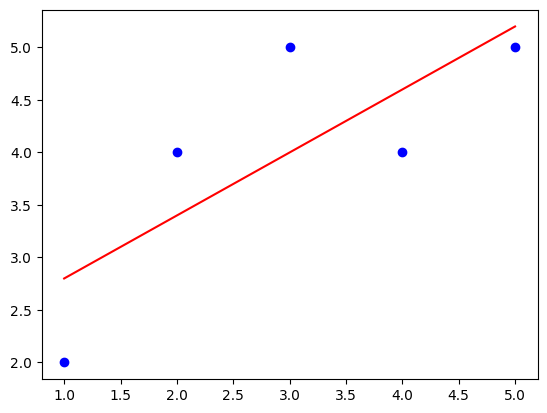

In [4]:
import numpy as np
def linear_regression(X, y):
    # Calculate the means of X and y
    X_mean = np.mean(X)
    y_mean = np.mean(y)

    # Calculate the terms needed for the numerator and denominator of beta_1
    numerator = np.sum((X - X_mean) * (y - y_mean))
    denominator = np.sum((X - X_mean) ** 2)

    # Calculate beta_1 and beta_0
    beta_1 = numerator / denominator
    beta_0 = y_mean - (beta_1 * X_mean)
    
    return beta_0, beta_1
def predict(X, beta_0, beta_1):
    return beta_0 + beta_1 * X

# Sample data
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Train the model
beta_0, beta_1 = linear_regression(X, y)
print(beta_0,beta_1)

# Make predictions
predictions = predict(X, beta_0, beta_1)

print("Predictions:", predictions)
print("Actual:", y)

import matplotlib.pyplot as plt

plt.scatter(X, y, color='blue')  # actual data points
plt.plot(X, predictions, color='red')  # our model's predictions
plt.show()


## Matrix Imprementation

In [1]:
import numpy as np

# Given data
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Reshaping X and y into column vectors
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

# Adding a column of ones to X for the intercept term
X_bias = np.c_[np.ones((X.shape[0], 1)), X]

# Calculating the closed-form solution
beta = np.linalg.inv(X_bias.T.dot(X_bias)).dot(X_bias.T).dot(y)

# Printing the coefficients
print("Coefficients (intercept and slope):", beta.flatten())


Coefficients (intercept and slope): [2.2 0.6]


## Gradient Descent Implementation 

In [5]:
import numpy as np

def compute_cost(X, y, m, b):
    N = len(y)
    total_error = 0.0
    for i in range(N):
        total_error += (y[i] - (m*X[i] + b)) ** 2
    return total_error / N

def step_gradient(X, y, m_current, b_current, learning_rate):
    m_gradient = 0
    b_gradient = 0
    N = float(len(y))

    for i in range(len(y)):
        x = X[i]
        y_actual = y[i]
        m_gradient += -(2/N) * x * (y_actual - ((m_current * x) + b_current))
        b_gradient += -(2/N) * (y_actual - ((m_current * x) + b_current))

    new_m = m_current - (learning_rate * m_gradient)
    new_b = b_current - (learning_rate * b_gradient)
    return [new_m, new_b]

def gradient_descent_runner(X, y, starting_m, starting_b, learning_rate, num_iterations):
    m = starting_m
    b = starting_b
    for i in range(num_iterations):
        m, b = step_gradient(X, y, m, b, learning_rate)
    return [m, b]

# Example data
# X = np.array([1, 2, 3, 4, 5])
# y = np.array([5, 7, 9, 11, 13])

X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Hyperparameters
learning_rate = 0.01
initial_m = 0
initial_b = 0
num_iterations = 1000

print("Starting gradient descent at m = {0}, b = {1}, error = {2}".format(initial_m, initial_b, compute_cost(X, y, initial_m, initial_b)))
print("Running...")
[m, b] = gradient_descent_runner(X, y, initial_m, initial_b, learning_rate, num_iterations)
print("After {0} iterations m = {1}, b = {2}, error = {3}".format(num_iterations, m, b, compute_cost(X, y, m, b)))


Starting gradient descent at m = 0, b = 0, error = 17.2
Running...
After 1000 iterations m = 0.6176946148762643, b = 2.136116825825789, error = 0.4807428243098693


In [2]:
import numpy as np

# Given data
X = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([1, 3, 5])

# Reshape y into a column vector if it's not already
y = y.reshape(-1, 1)

# Add a column of ones to X for the intercept term
X_bias = np.c_[np.ones((X.shape[0], 1)), X]

# Compute the closed-form solution
beta = np.linalg.inv(X_bias.T.dot(X_bias)).dot(X_bias.T).dot(y)

# Print the coefficients
print("Coefficients (including intercept):", beta.flatten())


LinAlgError: Singular matrix

## Ridge 

In [3]:
import numpy as np

class RidgeRegression:
    def __init__(self, lambda_param=1.0):
        self.lambda_param = lambda_param
        self.weights = None

    def fit(self, X, y):
        # Adding a column of ones to include the intercept term (bias)
        X_bias = np.c_[np.ones((X.shape[0], 1)), X]
        
        # Calculating the identity matrix, the size is the number of features + 1 for the bias
        I = np.identity(X_bias.shape[1])
        
        # Adjusting the first element (corresponding to the bias) to 0, as we do not regularize the bias term
        I[0, 0] = 0
        
        # Calculating the Ridge Regression coefficients (weights)
        self.weights = np.linalg.inv(X_bias.T.dot(X_bias) + self.lambda_param * I).dot(X_bias.T).dot(y)

    def predict(self, X):
        # Again, adding a column for the bias term
        X_bias = np.c_[np.ones((X.shape[0], 1)), X]
        
        # Predicting
        return X_bias.dot(self.weights)

# Example usage
if __name__ == "__main__":
    # Example data
    X = np.array([[1, 2], [3, 4], [5, 6]])
    y = np.array([1, 3, 5])

    # Creating an instance of RidgeRegression with a lambda parameter of 0.5
    ridge = RidgeRegression(lambda_param=0.5)
    ridge.fit(X, y)

    # Predicting
    predictions = ridge.predict(X)
    print("Predictions:", predictions)


Predictions: [1.06060606 3.         4.93939394]


## Log-cosh loss 

In [13]:
import numpy as np

def log_cosh_loss(y_true, y_pred):
    """Calculate the log-cosh loss."""
    return np.mean(np.log(np.cosh(y_pred - y_true)))

def gradient_w_log_cosh_loss(X, y_true, y_pred):
    """Calculate the gradient of the log-cosh loss w.r.t. weights."""
    return np.mean(np.tanh(y_pred - y_true) * X)

def gradient_b_log_cosh_loss(y_true, y_pred):
    """Calculate the gradient of the log-cosh loss w.r.t. bias."""
    return np.mean(np.tanh(y_pred - y_true))

def gradient_descent(X, y, lr=0.01, epochs=1000):
    """Perform gradient descent optimization using log-cosh loss."""
    n = len(y)
    w = 0  # Initialize weight
    b = 0  # Initialize bias

    for _ in range(epochs):
        y_pred = w * X + b
        
        # Calculate gradients
        grad_w = gradient_w_log_cosh_loss(X, y, y_pred)
        grad_b = gradient_b_log_cosh_loss(y, y_pred)

        # Update parameters
        w -= lr * grad_w
        b -= lr * grad_b

        # (Optional) Print the loss every 100 iterations
        if _ % 100 == 0:
            loss = log_cosh_loss(y, y_pred)
            print(f"Epoch {_}, Loss: {loss}")

    return w, b

# Sample data
X = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([1, 3, 5])

# Run gradient descent
w, b = gradient_descent(X, y, lr=0.05, epochs=1000)
print(f"Weights: {w}, Bias: {b}")


ValueError: operands could not be broadcast together with shapes (3,2) (3,) 